In [197]:
%pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user
%pip install opendatasets pandas numpy scikit-learn xgboost



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [198]:
## Importing the libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Loading the Training Data and using the Training Data to build the Model

## Data Loading

In [199]:
df_train = pd.read_csv('C:/Users/anirb/Downloads/AIML/Restuarant_Rev_Prediction/Train_dataset.csv')
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [200]:
#Convert Annual Turnover to Log
df_train['Annual Turnover'] = np.log1p(df_train['Annual Turnover'])



In [201]:
df_test = pd.read_csv('C:/Users/anirb/Downloads/AIML/Restuarant_Rev_Prediction/Test_dataset.csv')
df_test = df_test.rename(columns={'Endoresed By':'Endorsed By'})
df_test.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,...,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,...,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,...,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,...,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,...,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [202]:
## Checking for the null values
df_train.isnull().sum()

Registration Number                 0
Annual Turnover                     0
Cuisine                             0
City                                0
Restaurant Location                 0
Opening Day of Restaurant           0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         212
Live Music Rating                 765
Comedy Gigs 

## Data Cleanup

In [203]:
null_columns = df_train.columns[df_train.isna().any()]

# Print the column names
print("Columns with missing values:", null_columns.tolist())

Columns with missing values: ['Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Resturant Tier', 'Overall Restaurant Rating', 'Live Music Rating', 'Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating', 'Ambience']


In [204]:
## These columns have a high % of values as NaN , hence ignoring them
columns_to_drop = ['Comedy Gigs Rating','Value Deals Rating','Live Sports Rating']
df_train  = df_train.drop(columns_to_drop, axis=1, inplace=False) 

In [205]:
df_test  = df_test.drop(columns_to_drop, axis=1, inplace=False) 

In [206]:
df_train.nunique()

Registration Number              3493
Annual Turnover                   173
Cuisine                            20
City                              297
Restaurant Location                 2
Opening Day of Restaurant        1778
Facebook Popularity Quotient      776
Endorsed By                         3
Instagram Popularity Quotient     742
Fire Audit                          2
Liquor License Obtained             2
Situated in a Multi Complex         2
Dedicated Parking                   2
Open Sitting Available              2
Resturant Tier                      2
Restaurant Type                     4
Restaurant Theme                   34
Restaurant Zomato Rating            6
Restaurant City Tier                2
Order Wait Time                    10
Staff Responsivness                 8
Value for Money                     7
Hygiene Rating                      9
Food Rating                         6
Overall Restaurant Rating           5
Live Music Rating                   8
Ambience    

In [207]:
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,17.553180,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,5,5,7,10.0,4.0,8.0,8,6,6,6
1,60002,17.727534,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,6,7,8,9.0,NaN,5.0,7,7,3,8
2,60003,17.296751,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,5,3,7,8.0,3.0,7.0,10,5,2,8
3,60004,18.515991,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,5,6,8,9.0,6.0,7.0,7,4,3,5
4,60005,16.811243,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6,4,8,6.0,NaN,NaN,6,2,4,6


In [208]:
## Fill with Mean values
df_train=df_train.fillna(df_train.mean())
df_test=df_test.fillna(df_test.mean())


C:\Users\anirb\AppData\Local\Temp\ipykernel_27364\3882490538.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train=df_train.fillna(df_train.mean())
C:\Users\anirb\AppData\Local\Temp\ipykernel_27364\3882490538.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test=df_test.fillna(df_test.mean())


In [286]:
df_train.head()

,Registration Number,Annual Turnover,City,Restaurant Location,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,...,peruvian,polish,salvadorian,sapnish,swedish,thai,tibetan,turkish,welsh,Days Open
0,60001,17.553180,Bangalore,Near Business Hub,84.300000,Not Specific,95.8,1,1,1,...,0,0,0,0,0,0,0,0,0,2.228
1,60002,17.727534,Indore,Near Party Hub,85.400000,Tier A Celebrity,85.0,1,1,1,...,0,0,0,0,0,0,0,0,0,2.366
2,60003,17.296751,Chennai,Near Business Hub,85.000000,Tier A Celebrity,68.2,1,1,1,...,0,0,0,0,0,0,1,0,0,1.332
3,60004,18.515991,Gurgaon,Near Party Hub,85.600000,Tier A Celebrity,83.6,0,1,1,...,0,0,0,0,0,0,0,1,0,2.304
4,60005,16.811243,Manesar,Near Party Hub,77.938715,Tier A Celebrity,76.8,1,1,1,...,0,0,0,0,0,0,0,0,0,1.855


## Encode Values to Numeric

In [209]:
df_train['Endorsed By'].unique()

array(['Not Specific', 'Tier A Celebrity', 'Local Celebrity'],
      dtype=object)

In [210]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
df_train['Endorsed By LE'] = le.fit_transform(df_train['Endorsed By'])
df_test['Endorsed By LE'] = le.fit_transform(df_test['Endorsed By'])
 
# printing label
df_train['Endorsed By LE'].unique()


array([1, 2, 0])

In [211]:
df_train['Restaurant Location'].unique()

array(['Near Business Hub', 'Near Party Hub'], dtype=object)

In [212]:
# Using .fit_transform function to fit label
# encoder and return encoded label
df_train['Restaurant Location LE'] = le.fit_transform(df_train['Restaurant Location'])
df_test['Restaurant Location LE'] = le.fit_transform(df_test['Restaurant Location'])

# printing label
df_train['Restaurant Location LE'].unique()

array([0, 1])

In [213]:
df_train['Restaurant Type'].unique()


array(['Bar', 'Caffee', 'Gastro Bar', 'Buffet/Family Restaurant'],
      dtype=object)

In [214]:
# Using .fit_transform function to fit label
# encoder and return encoded label
df_train['Restaurant Type LE'] = le.fit_transform(df_train['Restaurant Type'])
df_test['Restaurant Type LE'] = le.fit_transform(df_test['Restaurant Type'])
 
# printing label
df_train['Restaurant Type LE'].unique()

array([0, 2, 3, 1])

In [215]:
df_train['Restaurant Theme'].unique()


array(['Arabian', 'Greek', "90's", 'Nature', 'Parsi', 'English',
       'Chinese', 'Delicio', 'Molino', 'Petit', 'Downtown', 'Italica',
       'Bettaso', 'Bakery', 'Mise En', 'Umami', 'Moonrise', 'Belise',
       'Cinnamon', 'Resca', 'TheGem', 'Benedicta', 'Marco', 'LaCuisine',
       'Spoon', 'Grand', 'Picante', 'Carbone', 'Flavors', 'Cafepro',
       'Savory', 'Piquant', 'Sage', 'Ambiance'], dtype=object)

In [216]:
# Using .fit_transform function to fit label
# encoder and return encoded label
df_train['Restaurant Theme LE'] = le.fit_transform(df_train['Restaurant Theme'])
df_test['Restaurant Theme LE'] = le.fit_transform(df_test['Restaurant Theme'])
 
# printing label
df_train['Restaurant Theme LE'].unique()

array([ 2, 16,  0, 23, 24, 13,  9, 11, 21, 25, 12, 17,  6,  3, 20, 33, 22,
        4, 10, 28, 32,  5, 19, 18, 31, 15, 26,  8, 14,  7, 30, 27, 29,  1])

In [217]:
df_train['City'].nunique()


297

In [218]:
# Using .fit_transform function to fit label
# encoder and return encoded label
df_train['City LE'] = le.fit_transform(df_train['City'])
df_test['City LE'] = le.fit_transform(df_test['City'])
 
# printing label
df_train['City LE'].unique()

array([ 24, 105,  57,  92, 144, 102,  26, 173, 130, 186,   5, 271, 116,
        65, 103,  25, 279, 249,  43, 165, 149, 170, 145, 197,  84,  39,
       154, 192,  88, 108, 280,  96, 275, 213, 143, 217, 185,  42, 187,
       247,  67, 137, 224, 266, 272,  80, 227,  63, 245,  77, 296, 285,
       159,  36, 278,  61,   8, 128,  28,  35, 155, 124, 259,  93, 238,
        51, 233, 127,  32,  12, 157,  89, 210, 288, 251,  40,  74, 117,
       293, 153, 132,  48,  97, 189, 234, 106, 254, 228, 121, 216,  15,
        33, 252,  64, 200, 113, 295, 175,  68,  23,  98, 193,  17, 141,
        91,  54,  16,   0,  52, 150, 290,  85, 182, 209, 273, 107,  58,
       237,  30,   3, 119, 129, 242, 168, 229, 219, 138,   9,  45, 174,
       286,  53,  81, 136,  71, 241, 140,  10, 163, 172,  34, 139, 171,
       152,  19,  94,  78, 104,  95, 277, 214,  59, 191, 211,  29, 123,
        99, 148,   4,  70, 268, 270, 248,  83, 101, 239, 156, 276,   7,
       223, 267, 176, 205, 184,  49, 201,   6,  46, 230,  18, 25

In [219]:
df_train['Cuisine'].nunique()


20

## Treat Cuisine Type

In [220]:
#df_train['Cuisine LE'] = le.fit_transform(df_train['Cuisine'])
#df_test['Cuisine LE'] = le.fit_transform(df_test['Cuisine'])
 
# printing label
#df_train['Cuisine LE'].nunique()


## Treat Cuisine Type

df_train = pd.concat([df_train.drop('Cuisine', 1), df_train['Cuisine'].str.get_dummies(sep=",")], 1)
df_test = pd.concat([df_test.drop('Cuisine', 1), df_test['Cuisine'].str.get_dummies(sep=",")], 1)
df_train.head()

C:\Users\anirb\AppData\Local\Temp\ipykernel_27364\1482353424.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train = pd.concat([df_train.drop('Cuisine', 1), df_train['Cuisine'].str.get_dummies(sep=",")], 1)
C:\Users\anirb\AppData\Local\Temp\ipykernel_27364\1482353424.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_train = pd.concat([df_train.drop('Cuisine', 1), df_train['Cuisine'].str.get_dummies(sep=",")], 1)
C:\Users\anirb\AppData\Local\Temp\ipykernel_27364\1482353424.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = pd.concat([df_test.drop('Cuisine', 1), df_test['Cuisine'].str.get_dummies(sep=",")], 1)
C:\Users\anirb\AppData\Local\Temp\ipykernel_27364\1482353424.py:11: FutureWarning: In a future version o

,Registration Number,Annual Turnover,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,nigerian,peruvian,polish,salvadorian,sapnish,swedish,thai,tibetan,turkish,welsh
0,60001,17.553180,Bangalore,Near Business Hub,14-02-2009,84.300000,Not Specific,95.8,1,1,...,0,0,0,0,0,0,0,0,0,0
1,60002,17.727534,Indore,Near Party Hub,29-09-2008,85.400000,Tier A Celebrity,85.0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,60003,17.296751,Chennai,Near Business Hub,30-07-2011,85.000000,Tier A Celebrity,68.2,1,1,...,0,0,0,0,0,0,0,1,0,0
3,60004,18.515991,Gurgaon,Near Party Hub,30-11-2008,85.600000,Tier A Celebrity,83.6,0,1,...,1,0,0,0,0,0,0,0,1,0
4,60005,16.811243,Manesar,Near Party Hub,22-02-2010,77.938715,Tier A Celebrity,76.8,1,1,...,0,0,0,0,0,0,0,0,0,0


In [221]:
df_train.head(15000)

,Registration Number,Annual Turnover,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,nigerian,peruvian,polish,salvadorian,sapnish,swedish,thai,tibetan,turkish,welsh
0,60001,17.553180,Bangalore,Near Business Hub,14-02-2009,84.300000,Not Specific,95.80,1,1,...,0,0,0,0,0,0,0,0,0,0
1,60002,17.727534,Indore,Near Party Hub,29-09-2008,85.400000,Tier A Celebrity,85.00,1,1,...,0,0,0,0,0,0,0,0,0,0
2,60003,17.296751,Chennai,Near Business Hub,30-07-2011,85.000000,Tier A Celebrity,68.20,1,1,...,0,0,0,0,0,0,0,1,0,0
3,60004,18.515991,Gurgaon,Near Party Hub,30-11-2008,85.600000,Tier A Celebrity,83.60,0,1,...,1,0,0,0,0,0,0,0,1,0
4,60005,16.811243,Manesar,Near Party Hub,22-02-2010,77.938715,Tier A Celebrity,76.80,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,63489,17.516813,-1,Near Party Hub,20-03-2009,69.100000,Not Specific,62.11,1,1,...,0,0,0,0,0,0,0,0,0,0
3489,63490,17.296751,Bangalore,Near Party Hub,05-02-2012,91.000000,Not Specific,96.30,1,1,...,0,0,0,0,0,0,0,1,0,0
3490,63491,17.565015,Chennai,Near Party Hub,21-05-2009,80.830000,Not Specific,86.80,1,1,...,0,0,0,0,0,0,0,0,0,0
3491,63492,17.785802,Bangalore,Near Party Hub,22-06-2008,79.400000,Not Specific,86.00,1,1,...,0,0,0,0,0,0,1,0,0,0


In [222]:
df_test.head()

,Registration Number,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,...,nigerian,peruvian,polish,salvadorian,sapnish,swedish,thai,tibetan,turkish,welsh
0,20001,Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1,20002,Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,1,...,0,0,0,0,0,0,0,1,0,0
2,20003,Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,20004,-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,20005,Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## Treat Date Field

In [223]:
import datetime
df_train['Opening Day of Restaurant'].max()

df_train['Opening Day of Restaurant'] =  pd.to_datetime(df_train['Opening Day of Restaurant'], format='%d-%m-%Y')
df_test['Opening Day of Restaurant'] =  pd.to_datetime(df_test['Opening Day of Restaurant'], format='%d-%m-%Y')

launch_date = datetime.datetime(2015, 3, 23)
# scale days open
df_train['Days Open'] = (launch_date - df_train['Opening Day of Restaurant']).dt.days / 1000
df_test['Days Open'] = (launch_date - df_test['Opening Day of Restaurant']).dt.days / 1000
df_train.drop('Opening Day of Restaurant', axis=1, inplace=True)
df_test.drop('Opening Day of Restaurant', axis=1, inplace=True)

df_train.head()

,Registration Number,Annual Turnover,City,Restaurant Location,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,...,peruvian,polish,salvadorian,sapnish,swedish,thai,tibetan,turkish,welsh,Days Open
0,60001,17.553180,Bangalore,Near Business Hub,84.300000,Not Specific,95.8,1,1,1,...,0,0,0,0,0,0,0,0,0,2.228
1,60002,17.727534,Indore,Near Party Hub,85.400000,Tier A Celebrity,85.0,1,1,1,...,0,0,0,0,0,0,0,0,0,2.366
2,60003,17.296751,Chennai,Near Business Hub,85.000000,Tier A Celebrity,68.2,1,1,1,...,0,0,0,0,0,0,1,0,0,1.332
3,60004,18.515991,Gurgaon,Near Party Hub,85.600000,Tier A Celebrity,83.6,0,1,1,...,0,0,0,0,0,0,0,1,0,2.304
4,60005,16.811243,Manesar,Near Party Hub,77.938715,Tier A Celebrity,76.8,1,1,1,...,0,0,0,0,0,0,0,0,0,1.855


In [224]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            500 non-null    int64  
 1   City                           500 non-null    object 
 2   Restaurant Location            500 non-null    object 
 3   Facebook Popularity Quotient   500 non-null    float64
 4   Endorsed By                    500 non-null    object 
 5   Instagram Popularity Quotient  500 non-null    float64
 6   Fire Audit                     500 non-null    int64  
 7   Liquor License Obtained        500 non-null    int64  
 8   Situated in a Multi Complex    500 non-null    int64  
 9   Dedicated Parking              500 non-null    int64  
 10  Open Sitting Available         500 non-null    int64  
 11  Resturant Tier                 500 non-null    int64  
 12  Restaurant Type                500 non-null    obj

## Split Train and Test

In [225]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df_train, test_size=0.2, random_state=42)
len(train_df), len(val_df) , len(df_test)

(2794, 699, 500)

## Train and Validation Dataset

In [226]:
target_col = 'Annual Turnover'
train_targets = train_df[target_col]
# Column to exclude
columns_to_exclude = ['Registration Number','Annual Turnover','City','Restaurant Location','Endorsed By','Restaurant Type','Restaurant Theme']
# Select all columns except 'col2' (using drop with subset and inplace=False)

train_inputs  = train_df.drop(columns_to_exclude, axis=1, inplace=False)  # Keep original intact

val_inputs = val_df.drop(columns_to_exclude, axis=1, inplace=False)  
val_targets = val_df[target_col]

In [227]:
columns_to_exclude_test = ['City','Restaurant Location','Endorsed By','Restaurant Type','Restaurant Theme']
df_test = df_test.drop(columns_to_exclude_test, axis=1, inplace=False)  

# Try Different Models

## Mean Regressor

In [228]:
#Simple Mean Model
#Let’s first create a simple model that always predicts the average. We’ll be using numpy library.
import numpy as np

class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [229]:
mean_model = MeanRegressor()
mean_model.fit(train_inputs, train_targets)
mean_model.mean
train_preds = mean_model.predict(train_inputs)
train_preds


array([17.08607238, 17.08607238, 17.08607238, ..., 17.08607238,
       17.08607238, 17.08607238])

In [230]:

val_preds  = mean_model.predict(val_inputs)
val_preds

array([17.08607238, 17.08607238, 17.08607238, 17.08607238, 17.08607238,
       17.08607238, 17.08607238, 17.08607238, 17.08607238, 17.08607238,
       17.08607238, 17.08607238, 17.08607238, 17.08607238, 17.08607238,
       17.08607238, 17.08607238, 17.08607238, 17.08607238, 17.08607238,
       17.08607238, 17.08607238, 17.08607238, 17.08607238, 17.08607238,
       17.08607238, 17.08607238, 17.08607238, 17.08607238, 17.08607238,
       17.08607238, 17.08607238, 17.08607238, 17.08607238, 17.08607238,
       17.08607238, 17.08607238, 17.08607238, 17.08607238, 17.08607238,
       17.08607238, 17.08607238, 17.08607238, 17.08607238, 17.08607238,
       17.08607238, 17.08607238, 17.08607238, 17.08607238, 17.08607238,
       17.08607238, 17.08607238, 17.08607238, 17.08607238, 17.08607238,
       17.08607238, 17.08607238, 17.08607238, 17.08607238, 17.08607238,
       17.08607238, 17.08607238, 17.08607238, 17.08607238, 17.08607238,
       17.08607238, 17.08607238, 17.08607238, 17.08607238, 17.08

In [231]:
val_targets

1945    16.906553
3362    16.906553
2649    17.576711
1880    16.811243
2768    16.811243
          ...    
742     17.707331
631     17.504390
1553    16.993564
1075    17.370859
162     16.929026
Name: Annual Turnover, Length: 699, dtype: float64

In [232]:
from sklearn.metrics import mean_squared_error


In [233]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
train_rmse

0.5473939054508794

In [234]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
val_rmse

0.5455469574872254

## Linear Regression

In [235]:
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(train_inputs, train_targets)
LinearRegression()


LinearRegression()

In [236]:
val_inputs.head()

,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,Restaurant City Tier,...,peruvian,polish,salvadorian,sapnish,swedish,thai,tibetan,turkish,welsh,Days Open
1945,74.00,62.00,1,1,1,1,0,2.0,2,0,...,0,0,0,0,0,0,1,0,0,1.298
3362,77.33,62.60,1,1,0,1,1,2.0,2,1,...,0,0,0,0,0,0,0,0,0,1.934
2649,81.00,63.00,1,1,1,1,0,2.0,3,0,...,0,0,0,0,0,0,0,0,0,1.742
1880,56.16,54.08,0,1,0,1,1,2.0,2,0,...,0,0,0,0,0,1,0,0,1,2.386
2768,78.00,82.80,1,1,0,1,0,2.0,3,1,...,0,0,0,0,0,0,0,1,0,1.521


In [237]:
train_preds = linreg_model.predict(train_inputs)
val_preds = linreg_model.predict(val_inputs)

#row_61946 = val_inputs.loc[df_train['Registration Number'] == 61946]
#print(row_61946)
#val_preds_RN = linreg_model.predict(row_61946)
#validation_mse_RN = np.sqrt(mean_squared_error([22000000], val_preds_RN))
#print(validation_mse_RN)

In [238]:
train_rmse_linreg = np.sqrt(mean_squared_error(train_preds, train_targets))
test_rmse_linreg = np.sqrt(mean_squared_error(val_preds, val_targets))
print(f'Train RMSE Linear Reg: {train_rmse_linreg:n}')
print(f'Test RMSE Linear Reg: {test_rmse_linreg:n}')
import matplotlib.pyplot as plt


Train RMSE Linear Reg: 0.470794
Test RMSE Linear Reg: 0.469557


## Ridge Linear Regression


In [239]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


params_ridge = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
#    'normalize' : [True,False],
    'solver' : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge_model = Ridge()
ridge_regressor = GridSearchCV(ridge_model, params_ridge, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
ridge_regressor.fit(train_inputs, train_targets)
print(f'Optimal alpha: {ridge_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {ridge_regressor.best_params_["fit_intercept"]}')
#print(f'Optimal normalize: {ridge_regressor.best_params_["normalize"]}')
print(f'Optimal solver: {ridge_regressor.best_params_["solver"]}')
print(f'Best score: {ridge_regressor.best_score_}')

Optimal alpha: 20.00
Optimal fit_intercept: True
Optimal solver: sparse_cg
Best score: -0.480166073390545


In [240]:
ridge_model = Ridge(alpha=ridge_regressor.best_params_["alpha"], fit_intercept=ridge_regressor.best_params_["fit_intercept"], 
                    solver=ridge_regressor.best_params_["solver"])
ridge_model.fit(train_inputs, train_targets)
train_preds = ridge_model.predict(train_inputs)
val_preds = ridge_model.predict(val_inputs)
print('Train r2 score: ', r2_score(train_preds, train_targets))
print('Test r2 score: ', r2_score(val_targets, val_preds))
train_rmse = np.sqrt(mean_squared_error(train_preds, train_targets))
test_rmse = np.sqrt(mean_squared_error(val_preds, val_targets))
print(f'Train RMSE Ridge: {train_rmse:n}')
print(f'Test RMSE Ridge: {test_rmse:n}')

Train r2 score:  -2.0258960977088285
Test r2 score:  0.26093115318453
Train RMSE Ridge: 0.471615
Test RMSE Ridge: 0.468936


## Lasso Model

In [268]:
params_lasso = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
}

lasso_model = Lasso()
lasso_regressor = GridSearchCV(lasso_model, params_lasso, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
lasso_regressor.fit(train_inputs, train_targets)
print(f'Optimal alpha: {lasso_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {lasso_regressor.best_params_["fit_intercept"]}')
print(f'Best score: {lasso_regressor.best_score_}')

Optimal alpha: 0.01
Optimal fit_intercept: True
Best score: -0.48772049238918475


In [272]:
lasso_model = Lasso(alpha=lasso_regressor.best_params_["alpha"], fit_intercept=lasso_regressor.best_params_["fit_intercept"], 
                    )
lasso_model.fit(train_inputs, train_targets)
train_preds = lasso_model.predict(train_inputs)
val_preds = lasso_model.predict(val_inputs)
print('Train r2 score: ', r2_score(train_preds, train_targets))
print('Test r2 score: ', r2_score(val_targets, val_preds))
train_rmse = np.sqrt(mean_squared_error(train_preds, train_targets))
test_rmse = np.sqrt(mean_squared_error(val_targets, val_preds))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -3.3259280135971405
Test r2 score:  0.22590075925530662
Train RMSE: 0.4842
Test RMSE: 0.4799


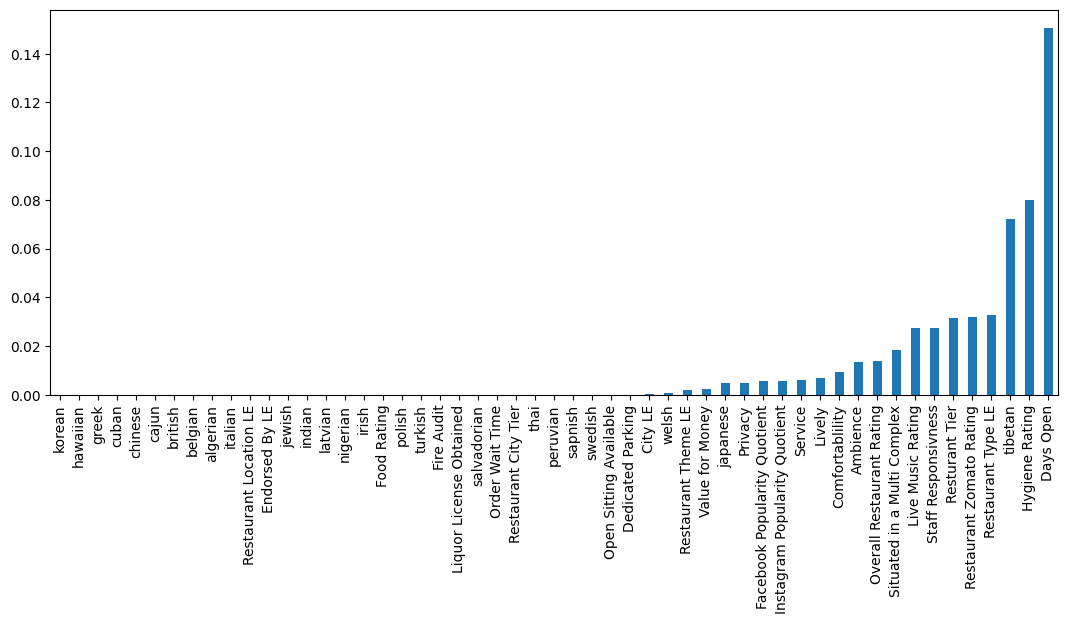

In [273]:
# Lasso Model Feature Importance
lasso_feature_coef = pd.Series(index = train_inputs.columns, data = np.abs(lasso_model.coef_))
lasso_feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5));

## XG Boost Model

In [241]:
from xgboost import XGBRegressor, plot_importance
params_xgb = {
    'learning_rate': [.1, .5, .7, .9, .95, .99, 1],
    'colsample_bytree': [.3, .4, .5, .6],
    'max_depth': [4],
    'alpha': [3],
    'subsample': [.5],
    'n_estimators': [30, 70, 100, 200]
}

xgb_model = XGBRegressor()
xgb_regressor = GridSearchCV(xgb_model, params_xgb, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
xgb_regressor.fit(train_inputs, train_targets)
print(f'Optimal lr: {xgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal colsample_bytree: {xgb_regressor.best_params_["colsample_bytree"]}')
print(f'Optimal n_estimators: {xgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {xgb_regressor.best_score_}')

Optimal lr: 0.1
Optimal colsample_bytree: 0.6
Optimal n_estimators: 100
Best score: -0.4770975611684567


In [242]:
xgb_model = XGBRegressor(learning_rate=xgb_regressor.best_params_["learning_rate"], 
                         colsample_bytree=xgb_regressor.best_params_["colsample_bytree"], 
                         max_depth=4, alpha=3, subsample=.5, 
                         n_estimators=xgb_regressor.best_params_["n_estimators"], n_jobs=-1)
xgb_model.fit(train_inputs, train_targets)
train_preds = xgb_model.predict(train_inputs)
val_preds = xgb_model.predict(val_inputs)
print('Train r2 score: ', r2_score(train_preds, train_targets))
print('Test r2 score: ', r2_score(val_targets, val_preds))
train_rmse = np.sqrt(mean_squared_error(train_preds, train_targets))
test_rmse = np.sqrt(mean_squared_error(val_targets, val_preds))
print(f'Train RMSE XGB: {train_rmse:n}')
print(f'Test RMSE XGB: {test_rmse:n}')

Train r2 score:  -1.018544786189223
Test r2 score:  0.24791883197765563
Train RMSE XGB: 0.411296
Test RMSE XGB: 0.473046


50 features with reduction of 5.66%


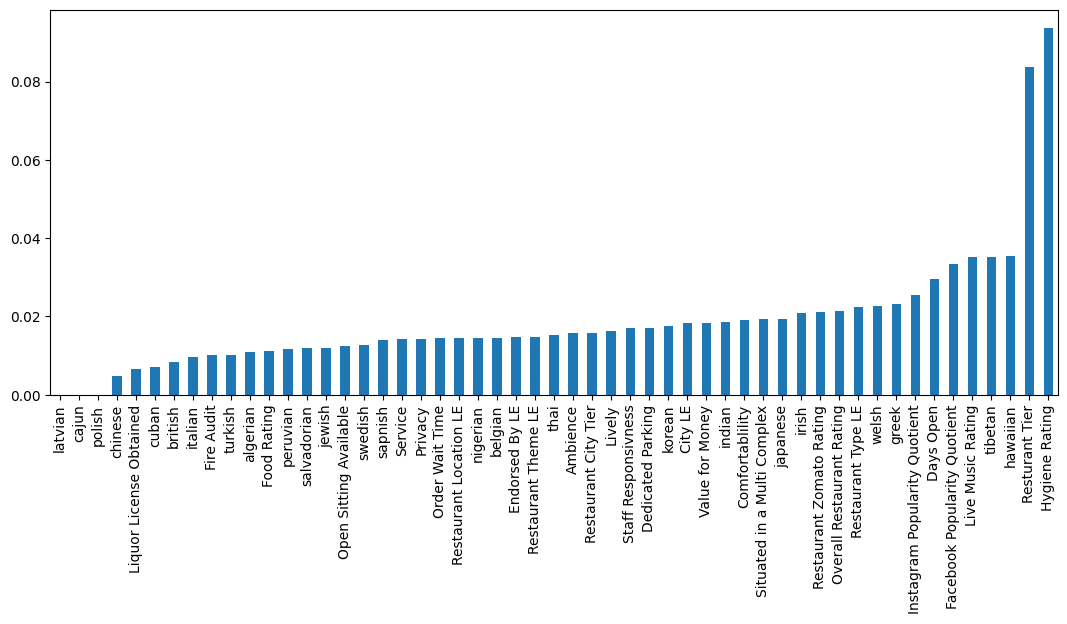

In [243]:
# XG Forest Model Feature Importance
rf_feature_importance = pd.Series(index = train_inputs.columns, data = np.abs(xgb_model.feature_importances_))
n_features = (rf_feature_importance>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(rf_feature_importance))*100:2.2f}%')
rf_feature_importance.sort_values().plot(kind = 'bar', figsize = (13,5));

## Random Forest Regressor

In [244]:
from sklearn.ensemble import RandomForestRegressor

params_rf = {
    'max_depth': [10, 30, 35, 50, 65, 75, 100],
    'max_features': [.3, .4, .5, .6],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [30, 50, 100, 200]
}

rf = RandomForestRegressor()
rf_regressor = GridSearchCV(rf, params_rf, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
rf_regressor.fit(train_inputs, train_targets)
print(f'Optimal depth: {rf_regressor.best_params_["max_depth"]}')
print(f'Optimal max_features: {rf_regressor.best_params_["max_features"]}')
print(f'Optimal min_sample_leaf: {rf_regressor.best_params_["min_samples_leaf"]}')
print(f'Optimal min_samples_split: {rf_regressor.best_params_["min_samples_split"]}')
print(f'Optimal n_estimators: {rf_regressor.best_params_["n_estimators"]}')
print(f'Best score: {rf_regressor.best_score_}')

Optimal depth: 50
Optimal max_features: 0.3
Optimal min_sample_leaf: 3
Optimal min_samples_split: 8
Optimal n_estimators: 100
Best score: -0.48180686435496034


In [245]:
rf_model = RandomForestRegressor(max_depth=rf_regressor.best_params_["max_depth"], 
                                 max_features=rf_regressor.best_params_["max_features"], 
                                 min_samples_leaf=rf_regressor.best_params_["min_samples_leaf"], 
                                 min_samples_split=rf_regressor.best_params_["min_samples_split"], 
                                 n_estimators=rf_regressor.best_params_["n_estimators"], 
                                 n_jobs=-1, oob_score=True)
rf_model.fit(train_inputs, train_targets)
train_preds = rf_model.predict(train_inputs)
val_preds = rf_model.predict(val_inputs)
print('Train r2 score: ', r2_score(train_preds, train_targets))
print('Test r2 score: ', r2_score(val_preds,val_targets ))
train_rmse = np.sqrt(mean_squared_error(train_preds, train_targets))
test_rmse = np.sqrt(mean_squared_error(val_targets, val_preds))
print(f'Train RMSE: {train_rmse:n}')
print(f'Test RMSE: {test_rmse:n}')

Train r2 score:  -0.01441874606362803
Test r2 score:  -3.093333007560563
Train RMSE: 0.307416
Test RMSE: 0.4741


53 features with reduction of 0.00%


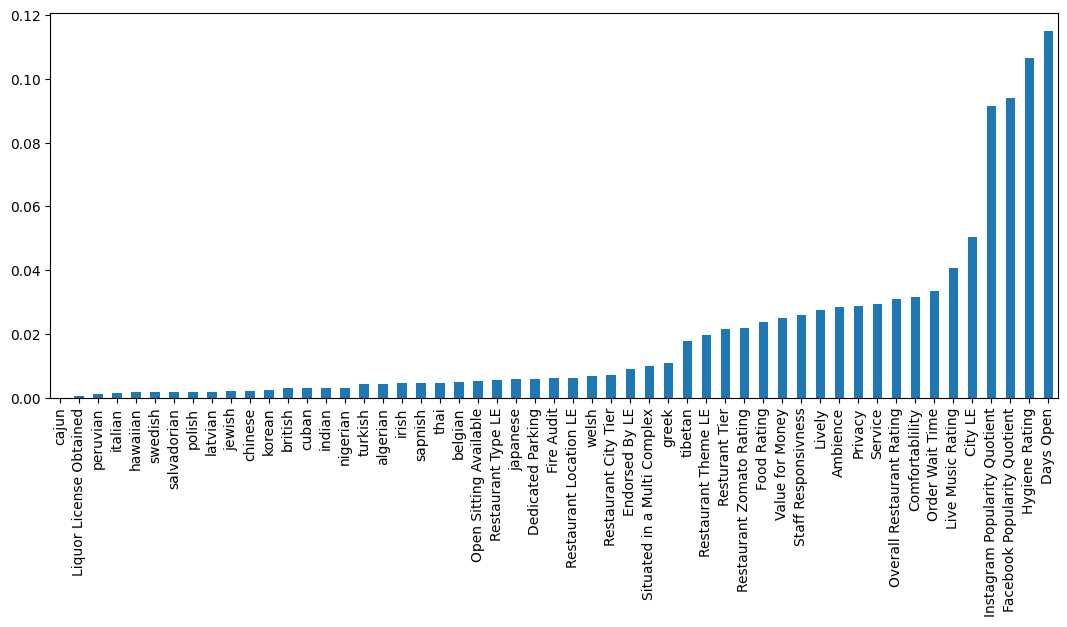

In [246]:
# Random Forest Model Feature Importance
rf_feature_importance = pd.Series(index = train_inputs.columns, data = np.abs(rf_model.feature_importances_))
n_features = (rf_feature_importance>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(rf_feature_importance))*100:2.2f}%')
rf_feature_importance.sort_values().plot(kind = 'bar', figsize = (13,5));

## KNN Regressor

In [247]:
from sklearn.neighbors import KNeighborsRegressor

params_knn = {
    'n_neighbors' : [3, 5, 7, 9, 11],
}

knn_model = KNeighborsRegressor()
knn_regressor = GridSearchCV(knn_model, params_knn, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
knn_regressor.fit(train_inputs, train_targets)
print(f'Optimal neighbors: {knn_regressor.best_params_["n_neighbors"]}')
print(f'Best score: {knn_regressor.best_score_}')

Optimal neighbors: 11
Best score: -0.525992647786492


In [248]:
knn_model = KNeighborsRegressor(n_neighbors=knn_regressor.best_params_["n_neighbors"])
knn_model.fit(train_inputs, train_targets)
train_preds = knn_model.predict(train_inputs)
val_preds = knn_model.predict(val_inputs)
print('Train r2 score: ', r2_score(train_preds, train_targets))
print('Test r2 score: ', r2_score(val_targets, val_preds))
train_rmse = np.sqrt(mean_squared_error(train_preds, train_targets))
test_rmse = np.sqrt(mean_squared_error(val_targets, val_preds))
print(f'Train RMSE: {train_rmse:n}')
print(f'Test RMSE: {test_rmse:n}')

Train r2 score:  -3.0146982364255397
Test r2 score:  0.09762172348701503
Train RMSE: 0.478826
Test RMSE: 0.518162


## Stacking Regressor

### Stack 1 - Ridge Lasso RF

In [266]:
rf_model_en = RandomForestRegressor(max_depth=200, max_features=0.4, min_samples_leaf=3, 
                                 min_samples_split=6, n_estimators=30, n_jobs=-1, oob_score=True)
rf_model_en.fit(train_inputs, train_targets)
train_preds = rf_model_en.predict(train_inputs)
val_preds = rf_model_en.predict(val_inputs)
print('Train r2 score: ', r2_score(train_preds, train_targets))
print('Test r2 score: ', r2_score(val_targets, val_preds))
train_rmse = np.sqrt(mean_squared_error(train_preds, train_targets))
test_rmse = np.sqrt(mean_squared_error(val_targets, val_preds))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.24980084989526175
Test r2 score:  0.22485857261205977
Train RMSE: 0.2869
Test RMSE: 0.4802


ridge -0.360 0.016
lasso -0.366 0.017
rf_en -0.365 0.017
stacking -0.358 0.016


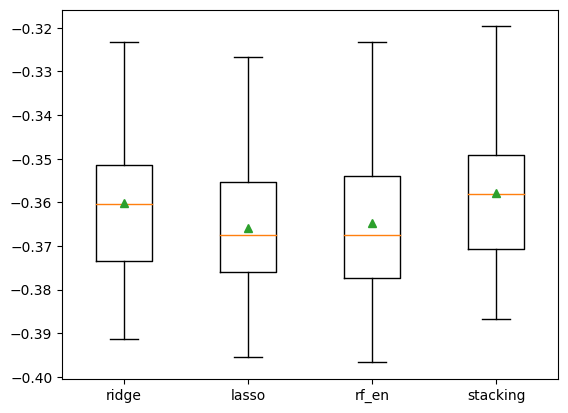

In [274]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    base_models = list()
    base_models.append(('ridge', ridge_model))
    base_models.append(('lasso', lasso_model))
    base_models.append(('rf', rf_model_en))
    # define meta learner model
    learner = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=base_models, final_estimator=learner, cv=10)
    return model
 
# get a list of models to evaluate
def get_models():
    models = dict()
    models['ridge'] = ridge_model
    models['lasso'] = lasso_model
    models['rf_en'] = rf_model_en
    models['stacking'] = get_stacking()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=19)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, train_inputs, train_targets)
    results.append(scores)
    names.append(name)
    print(f'{name} {mean(scores):.3f} {std(scores):.3f}')
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [275]:
# define the base models
base_models = list()
base_models.append(('ridge', ridge_model))
base_models.append(('lasso', lasso_model))
base_models.append(('rf', rf_model_en))
# define meta learner model
learner = LinearRegression()
# define the stacking ensemble
stack1 = StackingRegressor(estimators=base_models, final_estimator=learner, cv=10)
# fit the model on all available data
stack1.fit(train_inputs, train_targets)

StackingRegressor(cv=10,
                  estimators=[('ridge', Ridge(alpha=20, solver='sparse_cg')),
                              ('lasso', Lasso(alpha=0.01)),
                              ('rf',
                               RandomForestRegressor(max_depth=200,
                                                     max_features=0.4,
                                                     min_samples_leaf=3,
                                                     min_samples_split=6,
                                                     n_estimators=30, n_jobs=-1,
                                                     oob_score=True))],
                  final_estimator=LinearRegression())

In [277]:
train_preds = stack1.predict(train_inputs)
val_preds = stack1.predict(val_inputs)
print('Train r2 score: ', r2_score(train_preds, train_targets))
print('Test r2 score: ', r2_score(val_targets, val_preds))
train_rmse = np.sqrt(mean_squared_error(train_preds, train_targets))
test_rmse = np.sqrt(mean_squared_error(val_targets, val_preds))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -0.9398069033660488
Test r2 score:  0.2591287949815818
Train RMSE: 0.3988
Test RMSE: 0.4695


### Stack 2 - RF 1 / 2 / 3

In [276]:
# define the base models
base_model = list()
base_model.append(('rf1', rf_model))
base_model.append(('rf2', rf_model_en))
base_model.append(('rf3', RandomForestRegressor(max_depth=8, max_features=0.1, min_samples_leaf=3, 
                                                min_samples_split=2, n_estimators=250, n_jobs=-1, oob_score=False)))
# define meta learner model
learner = LinearRegression()
# define the stacking ensemble
stack2 = StackingRegressor(estimators=base_model, final_estimator=learner, cv=10)
# fit the model on all available data
stack2.fit(train_inputs, train_targets)

StackingRegressor(cv=10,
                  estimators=[('rf1',
                               RandomForestRegressor(max_depth=50,
                                                     max_features=0.3,
                                                     min_samples_leaf=3,
                                                     min_samples_split=8,
                                                     n_jobs=-1,
                                                     oob_score=True)),
                              ('rf2',
                               RandomForestRegressor(max_depth=200,
                                                     max_features=0.4,
                                                     min_samples_leaf=3,
                                                     min_samples_split=6,
                                                     n_estimators=30, n_jobs=-1,
                                                     oob_score=True)),
                              ('rf3',
                               RandomForestRegressor(max_depth=8,
                                                     max_features=0.1,
                                                     min_samples_leaf=3,
                                                     n_estimators=250,
                                                     n_jobs=-1))],
                  final_estimator=LinearRegression())

In [278]:
train_preds = stack2.predict(train_inputs)
val_preds = stack2.predict(val_inputs)
print('Train r2 score: ', r2_score(train_preds, train_targets))
print('Test r2 score: ', r2_score(val_targets, val_preds))
train_rmse = np.sqrt(mean_squared_error(train_preds, train_targets))
test_rmse = np.sqrt(mean_squared_error(val_targets, val_preds))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -0.32339005194353243
Test r2 score:  0.2487229152954964
Train RMSE: 0.3531
Test RMSE: 0.4728


# Loading the Test Data and using the Test Data to Predict the target Variable

In [249]:
df_test.head()

,Registration Number,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,...,peruvian,polish,salvadorian,sapnish,swedish,thai,tibetan,turkish,welsh,Days Open
0,20001,78.00,69.00,1,1,1,1,0,2,3,...,0,0,0,0,0,0,1,0,0,1.714
1,20002,89.17,96.00,1,1,1,1,1,2,4,...,0,0,0,0,0,0,1,0,0,1.295
2,20003,84.00,86.00,1,1,1,0,1,2,2,...,0,0,0,0,0,0,0,0,0,1.441
3,20004,79.38,74.40,0,1,1,1,1,2,3,...,0,0,0,0,0,0,1,0,0,3.718
4,20005,84.67,86.46,1,1,1,0,0,1,4,...,0,0,0,0,0,0,0,0,0,2.324


In [279]:
## Using the model built on the Training set to predict on the Test Set
df_test_for_prediction = df_test.drop('Registration Number',axis=1, inplace=False)
prediction_linreg = linreg_model.predict(df_test_for_prediction)
prediction_rf = rf_model.predict(df_test_for_prediction)
prediction_xgb_model = xgb_model.predict(df_test_for_prediction)
prediction_ridge_model = ridge_model.predict(df_test_for_prediction)
prediction_knn_model = knn_model.predict(df_test_for_prediction)

prediction_lasso_model = lasso_model.predict(df_test_for_prediction)
prediction_stack1_model = stack1.predict(df_test_for_prediction)
prediction_stack2_model = stack2.predict(df_test_for_prediction)


# Saving the output in a data frame and then exporting it to a '.csv' file with the appropriate 'Registration Number'.

In [251]:
solution_df = pd.DataFrame(df_test['Registration Number'])
solution_df

,Registration Number
0,20001
1,20002
2,20003
3,20004
4,20005
...,...
495,20496
496,20497
497,20498
498,20499


In [284]:
#solution_df['Annual Turnover'] = prediction_rf

#solution_df['Annual Turnover'] = np.expm1(prediction_rf).astype('int64')

#solution_df['Annual Turnover'] = np.expm1(prediction_xgb_model).astype('int64')

#solution_df['Annual Turnover'] = np.expm1(prediction_ridge_model).astype('int64')              ////BEST

#solution_df['Annual Turnover'] = np.expm1(prediction_knn_model).astype('int64')

#solution_df['Annual Turnover'] = np.expm1(prediction_lasso_model).astype('int64')

#solution_df['Annual Turnover'] = np.expm1(prediction_stack1_model).astype('int64')

solution_df['Annual Turnover'] = np.expm1(prediction_stack2_model).astype('int64')



solution_df

,Registration Number,Annual Turnover
0,20001,24820769
1,20002,33008688
2,20003,25597203
3,20004,41543435
4,20005,43601869
...,...,...
495,20496,28154845
496,20497,25138808
497,20498,27144835
498,20499,45043992


In [258]:
## Setting the directory to export the file as a '.csv'

import os
os.chdir('C:\\Users\\anirb\\Downloads\\AIML\\Restuarant_Rev_Prediction\\')

In [285]:
## Exporting the data frame to a '.csv' file and setting the index = False as we do want the index

solution_df.to_csv('Submission_Stack2_log.csv',index=False)

# END